<div style="text-align: center;">
    <span style="font-size: 24px;"><strong><u>Proyecto Titanic</u></strong></span>
</div>




Este proyecto es una práctica inicial ideal para quienes comienzan en Ciencia de Datos. Su objetivo es predecir quién podría sobrevivir utilizando las variables recolectadas. La metodología aplicada es CRISP-DM (Cross Industry Standard Process for Data Mining), que sigue estos pasos:

<u>Entendimiento del Negocio:</u> Definir los objetivos del negocio y traducirlos en un problema de datos que pueda resolverse mediante análisis.

<u>Entendimiento de los Datos:</u> Recopilar y explorar los datos para comprender su calidad y estructura, determinando cómo pueden utilizarse para resolver el problema.

<u>Preparación de los Datos:</u> Limpiar y transformar los datos para adaptarlos a los requisitos del análisis y modelado.

<u>Modelado:</u> Aplicar técnicas analíticas para construir modelos predictivos o descriptivos que aborden el problema definido.

<u>Evaluación:</u> Evaluar el modelo en función de los objetivos del negocio, asegurando que cumpla con los requisitos y aporte valor.

<u>Despliegue:</u> Implementar el modelo en un entorno de producción para su uso en la toma de decisiones o en operaciones diarias.

Se comienza agregando las librerías necesarias para el proyecto:

In [248]:
import pandas as pd #manipulacion de los datos
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer #imputar valores nulos
from sklearn.preprocessing import OrdinalEncoder

<strong><u>2.Entedimiento de los datos<u><strong>


Leer los archivos de entrenamiento y test:

In [249]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

Visión general del dataset de entrenamiento para entender las variables de estudio.<br>
"Parch" = "Number of Parents/Children Aboard"<br>
"SibSp" es una abreviatura para "Siblings/Spouses"<br>
Fare: tarifa


In [250]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
123,124,1,2,"Webber, Miss. Susan",female,32.50,0,0,27267,13.0000,E101,S
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
287,288,0,3,"Naidenoff, Mr. Penko",male,22.00,0,0,349206,7.8958,NaN,S
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,NaN,Q
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.00,0,0,110152,86.5000,B77,S


In [251]:
print("Cantidad de registros y columnas: ")
df_train.shape

Cantidad de registros y columnas: 


(891, 12)

In [252]:
print("TIpos de datos: ")
df_train.dtypes

TIpos de datos: 


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [253]:
print("Información general: ")

df_train.info()

Información general: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [254]:
print("Cantidad de valores duplicados: ")
df_train.duplicated().sum()

Cantidad de valores duplicados: 


0

Suma de valores nulos ordenados por aquellas columnas que tienen mayor cantidad:

In [255]:
df_train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

Cantidad de valores únicos: De esta observación, se puede deducir que las variables con muchos valores únicos no son útiles para la predicción.

In [256]:
df_train.nunique().sort_values(ascending=True)

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

Análisis de las columnas categóricas. Para reconocerlas son aquellas que el tipo de dato es "object".<br>
categoricas df_train[column].nunique():Cuenta el número de valores unicos de la columna.<br>
print(f'{column}: {df_train[column].unique()}'):Imprime el nombre de la columna y los valores únicos que contiene.

In [257]:
# Almacena las columnas categóricas en una lista
columnas_categoricas = df_train.select_dtypes(include=['object'])

for column in columnas_categoricas:
    # Recorre la lista e imprime los valores únicos de las columnas con 10 o menos valores únicos
    if df_train[column].nunique() <= 10:
        print(f'{column}: {df_train[column].unique()}')


Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q' nan]


De manera similar a las columnas categóricas, se analizan los valores únicos de las variables numéricas:

In [258]:
columnas_numericas = df_train.select_dtypes(include=['int64', 'int64'])
print("Columnas numéricas:", columnas_numericas.columns)
print()
for column in columnas_numericas:
    #para que acceda a las que son unicas
    if df_train[column].nunique()<=10:
        print(f'{column}: {sorted(df_train[column].unique())}')

Columnas numéricas: Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object')

Survived: [0, 1]
Pclass: [1, 2, 3]
SibSp: [0, 1, 2, 3, 4, 5, 8]
Parch: [0, 1, 2, 3, 4, 5, 6]


EDA: Breve análisis exploratorio sobre la supervivencia, incluyendo algunos gráficos de quienes sobrevivieron y quienes no:

<Axes: xlabel='Survived', ylabel='count'>

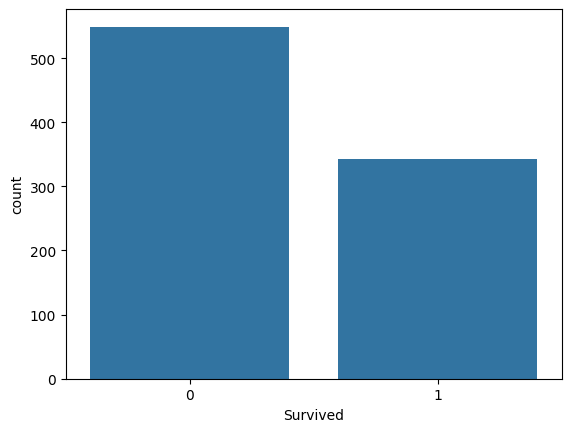

In [259]:
sns.countplot(x='Survived',data=df_train)

Gráfico de supervivencia por sexo: se deduce que la mayoría de los sobrevivientes eran mujeres.

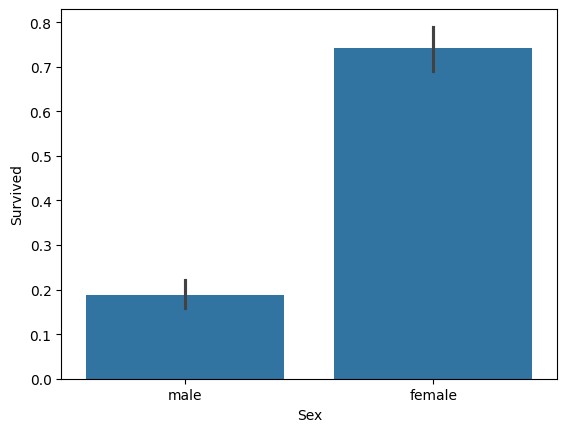

In [260]:
sns.barplot(x='Sex', y='Survived',data=df_train)
plt.show()

Conclusiones: Las variables PassengerId, Name, Ticket, Fare y Cabin (este úlimo con valores nulos) no aportan significativamente a la predicción, por lo que es recomendable eliminarlas del dataset, excepto PassengerId, que se utilizará para la realizar las predicciones de la muestra de test.

In [261]:
df_train=df_train.drop(columns=['Cabin','Fare','Ticket','Name'])
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


Revisar que el dataset de test tiene las mismas columnas

In [262]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Como tiene las mismas columnas, se eliminas las que no aportan al estudio, a excepcion de PassengerId

In [263]:
df_test=df_test.drop(columns=['Cabin','Fare','Ticket','Name'])
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S


<strong><u>3.Preparación de los datos</strong></u>

Se separan las variables predictoras del objetivo: X incluye todas las columnas excepto Survived. "y" es la columna Survived, que se debe predecir.

In [264]:
X = df_train.drop(columns=['Survived'])
y = df_train['Survived']
print(X.columns, y)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object') 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Transformar las columnas categóricas a numéricas.<br>
Se seleccionan la columnas categóricas. Para ello, selecciono las

In [265]:
s=(X.dtypes=='object')
print("Es categórica o no?: ")
print(s)
print()
object_cols=list(s[s].index)
print("Columnas categoricas: ", object_cols)

Es categórica o no?: 
PassengerId    False
Pclass         False
Sex             True
Age            False
SibSp          False
Parch          False
Embarked        True
dtype: bool

Columnas categoricas:  ['Sex', 'Embarked']


Convertir las columnas categóricas en valores numéricos en el DataFrame X utilizando el OrdinalEncoder.

In [266]:
#Crea una instancia de OrdinalEncoder. 
# Este codificador asigna un valor entero a cada categoría en una columna. 
# Cada categoría se transforma en un número entero basado en su orden en los datos:
ordinal_encoder=OrdinalEncoder()

#X[object_cols]: Selecciona las columnas categóricas del DataFrame X que están en la lista object_cols.
#ordinal_encoder.fit_transform(X[object_cols]): Ajusta el OrdinalEncoder a las columnas categóricas 
# (es decir, aprende el mapeo de categorías a enteros) y luego transforma estas columnas 
# (es decir, convierte las categorías en números enteros). 
# La transformación se aplica a las columnas categóricas de X.
#X[object_cols] = ...: Asigna la versión transformada de estas columnas de vuelta a X
X[object_cols]=ordinal_encoder.fit_transform(X[object_cols])

X.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,1.0,22.0,1,0,2.0
1,2,1,0.0,38.0,1,0,0.0
2,3,3,0.0,26.0,0,0,2.0
3,4,1,0.0,35.0,1,0,2.0
4,5,3,1.0,35.0,0,0,2.0
5,6,3,1.0,NaN,0,0,1.0
6,7,1,1.0,54.0,0,0,2.0
7,8,3,1.0,2.0,3,1,2.0
8,9,3,0.0,27.0,0,2,2.0
9,10,2,0.0,14.0,1,0,0.0


Rellenar los valores nulos con la libreria SimpleImputer

In [267]:

#Crea una instancia de SimpleImputer con los parámetros por defecto. 
# Por defecto, SimpleImputer rellena los valores nulos utilizando la estrategia mean, 
# es decir, reemplaza los valores nulos con la media de la columna
imputer=SimpleImputer()
#imputer.fit_transform(X): Ajusta el SimpleImputer a los datos en X (es decir, calcula la media, mediana, etc.,
# según la estrategia seleccionada) y transforma X rellenando los valores nulos con los valores calculados.
#pd.DataFrame(...): Convierte el resultado del fit_transform, que es un array numpy, 
# de vuelta a un DataFrame de pandas para mantener la estructura tabular de los datos.
x_transformed=pd.DataFrame(imputer.fit_transform(X))

x_transformed.columns=X.columns
x_transformed.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

Transformar en categóricas tambien el dataframe de test para utilizarlo luego en el modelo

In [268]:
df_test[object_cols]=ordinal_encoder.fit_transform(df_test[object_cols])

<strong><u>4. Creación del modelo y entrenamiento</strong></u>

Se aplica el modelo RandomForesClassifier: es un algoritmo de aprendizaje supervisado que construye múltiples árboles de decisión durante el entrenamiento y produce la clase que es el modo de las clases (clasificación) de los árboles individuales.Es decir, construye el conjunto de árboles de decisión basándose en los ejemplos proporcionados por x_transformed e y.

División del Conjunto de Datos en conjuntos de entrenamiento y prueba. Esto permitirá evaluar el rendimiento del modelo en datos.

In [269]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x_transformed, y, test_size=0.2, random_state=42)


Entrenamiento del Modelo: Entrena el modelo utilizando el conjunto de entrenamiento.

In [270]:
model=RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

Predicciones en el Conjunto de Validación: Genera predicciones para el conjunto de validación.

In [271]:

y_pred = model.predict(X_valid)

Hacer las predicciones

In [272]:
df_test_transformed=pd.DataFrame(imputer.transform(df_test))
df_test_transformed.columns=df_test.columns

predictions=model.predict(df_test_transformed)

Guardar las predicciones en un archivo de prediciones "submission.csv" guardando passengerID y survived

In [273]:
output=pd.DataFrame({'passengerId':df_test.PassengerId, 'survived':predictions})
output.to_csv('submission.csv',index=False)

<strong><u>5 Evaluacion del modelo<strong><u>

Métricas como precisión (accuracy), sensibilidad (recall), precisión (en términos de predicciones correctas) y el puntaje F1 sirve para evaluar el rendimiento del modelo. Estas métricas ayudan a determinar cuán bien está funcionando el modelo.


In [274]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.8101
Precision: 0.8125
Recall: 0.7027
F1 Score: 0.7536


Curva ROC y AUC: Para una evaluación más completa,generar la curva ROC y calcular el AUC (Area Under the Curve).

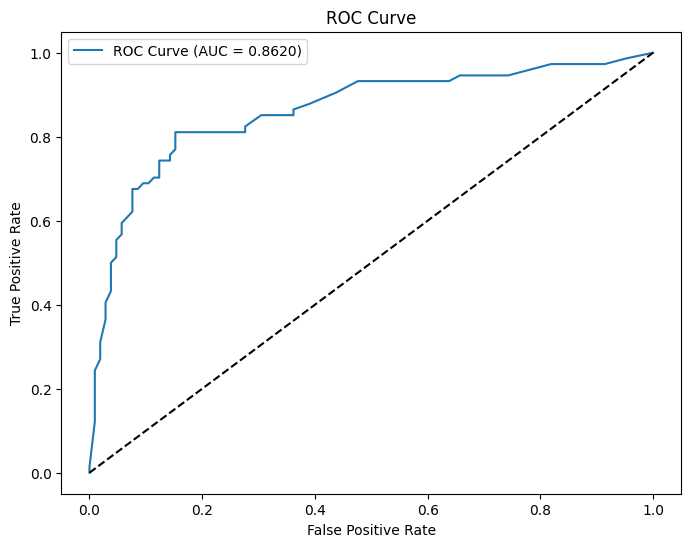

In [275]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = model.predict_proba(X_valid)[:, 1]  # Probabilidades para la clase positiva
fpr, tpr, thresholds = roc_curve(y_valid, y_probs)
auc = roc_auc_score(y_valid, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
